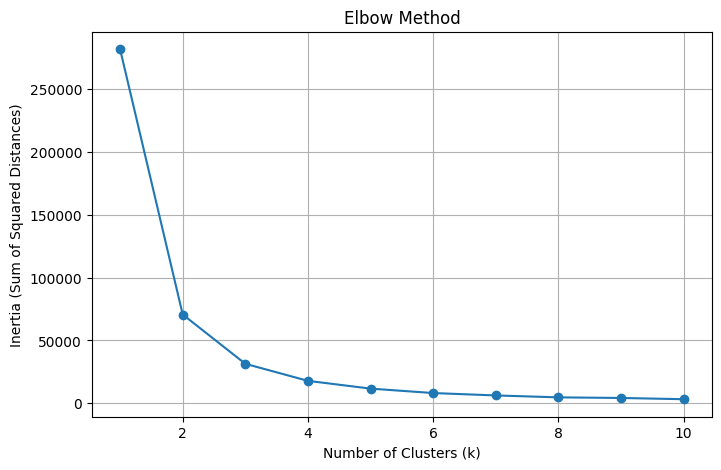

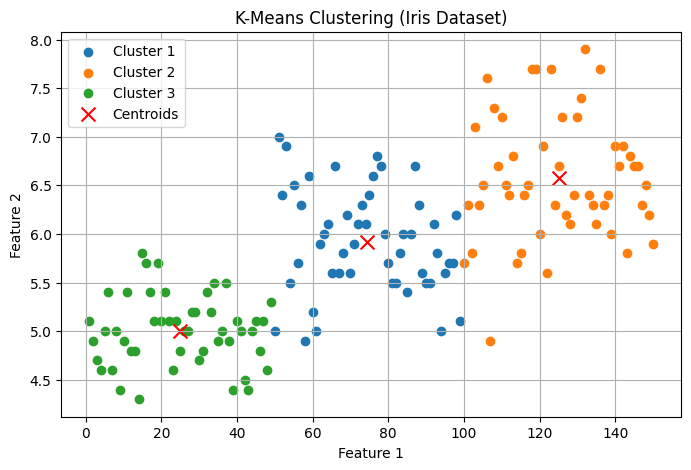

Centroids:
 [[ 74.5          5.922        2.78         4.206        1.304     ]
 [125.           6.57058824   2.97058824   5.52352941   2.01176471]
 [ 25.           5.00612245   3.42040816   1.46530612   0.24489796]]
Cluster Assignments
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load the Iris dataset
iris_data = pd.read_csv('Iris.csv')

# Extract features 
data = iris_data.drop(columns=['Species']).values 

# Apply K-Means clustering (k = 3 as per your choice)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

# Get the cluster labels and centroids
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

def elbow_method(data, max_k=10):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)  
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), inertias, marker='o')
    plt.title("Elbow Method")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia (Sum of Squared Distances)")
    plt.grid()
    plt.show()

elbow_method(data, max_k=10)

# Visualize the clusters
plt.figure(figsize=(8, 5))
for cluster_index in range(3):
    cluster_points = data[clusters == cluster_index]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_index + 1}")
    
# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label="Centroids")
plt.title("K-Means Clustering (Iris Dataset)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()

print("Centroids:\n", centroids)
print("Cluster Assignments\n", clusters)